## Official Setup

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, label_binarize

In [29]:
DATA_PATH = '../data/BipolarDerivedDataTraining.csv'
NTHREADS = 32

In [30]:
# take the residual of all features, by fitting a model containing the feature names
class ResidFeatures(BaseEstimator, TransformerMixin):
    # Class Constructor 
    def __init__(self, feature_idxs):
        self._feature_idxs = feature_idxs
    
    #Return self nothing else to do here    
    def fit(self, X, y = None):
        return self 
    
    def _linr(self, X, y):
        lm = LinearRegression().fit(X, y)
        return np.atleast_2d(y - lm.predict(X)).T

    # take the residual from variables of non-interest
    def transform(self, X, y = None):
        feature_X = np.hstack(
            [label_binarize(X[:,f], np.unique(X[:,f]))
             if type(X[0,f]) == str else np.atleast_2d(X[:,f]).T
             for f in self._feature_idxs]
        )
        new_X = np.delete(X, self._feature_idxs, axis=1)
        resid_X = np.hstack([self._linr(feature_X, new_X[:,c]) for c in range(new_X.shape[1])])
            
        return resid_X 

In [31]:
bp_df = pd.read_csv(DATA_PATH)

In [32]:
selected_df = bp_df.filter(regex=("age$|gender|handedness|31p.*[^r]$|t1r.*_m|alff.*_m|vol|dti"))

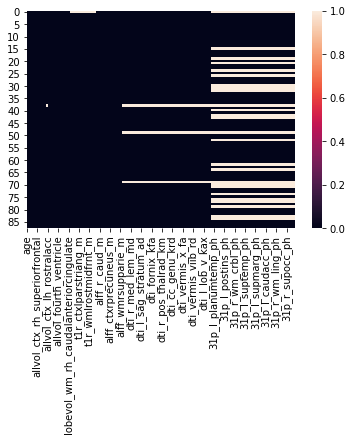

In [33]:
sns.heatmap(selected_df.isna())

In [34]:
# after imputation these columns are placed at the end of the matrix (passthrough)
resid_features = ['gender', 'age', 'handedness']
resid_feature_idxs = np.arange(len(selected_df.columns) - len(resid_features), len(selected_df.columns))
resid_feature_idxs
# imputation_idxs (gender, age, sex are still the first columns here)
imputation_idxs = np.arange(len(resid_feature_idxs), len(selected_df.columns))
imputation_idxs

array([   3,    4,    5, ..., 1854, 1855, 1856])

In [35]:
group = bp_df['group']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(selected_df, group, test_size=10, stratify=group)

In [38]:
# try the best model?
imputer = ColumnTransformer(
    remainder='passthrough',
    transformers=[('impute', IterativeImputer(add_indicator=False,
                                              initial_strategy='median',
                                              imputation_order='random',
                                              sample_posterior=True,
                                              max_iter=10,
                                              n_nearest_features=50),
                    imputation_idxs)])
resid = ResidFeatures(feature_idxs=resid_feature_idxs)

scaler = StandardScaler()
pca = PCA(n_components=2, whiten=True)
clf = GradientBoostingClassifier(n_estimators=1000, max_depth=25, learning_rate=0.1)
pipelineM = Pipeline([("imp", imputer),
                      ("resid", resid),
                      ("scaler", scaler),
                      ("pca", pca),
                      ("clf", clf)])
pipelineM.fit(X_train, y_train)
pipelineM.score(X_test, y_test)

0.4

## Playground

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.decomposition import PCA, KernelPCA, DictionaryLearning, FactorAnalysis
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.preprocessing import (
    PowerTransformer, StandardScaler, PolynomialFeatures,
    FunctionTransformer, OneHotEncoder, LabelBinarizer,
    label_binarize)
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
from statsmodels.stats.diagnostic import kstest_normal, normal_ad
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.cluster import FeatureAgglomeration
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
# take the residual of all features, by fitting a model containing the feature names
class ResidFeatures(BaseEstimator, TransformerMixin):
    # Class Constructor 
    def __init__(self, feature_idxs):
        self._feature_idxs = feature_idxs
    
    #Return self nothing else to do here    
    def fit(self, X, y = None):
        return self 
    
    def _linr(self, X, y):
        lm = LinearRegression().fit(X, y)
        return np.atleast_2d(y - lm.predict(X)).T

    # take the residual from variables of non-interest
    def transform(self, X, y = None):
        feature_X = np.hstack(
            [label_binarize(X[:,f], np.unique(X[:,f]))
             if type(X[0,f]) == str else np.atleast_2d(X[:,f]).T
             for f in self._feature_idxs]
        )
        new_X = np.delete(X, self._feature_idxs, axis=1)
        resid_X = np.hstack([self._linr(feature_X, new_X[:,c]) for c in range(new_X.shape[1])])
            
        return resid_X 

In [ ]:
resf = ResidFeatures(feature_idxs=[1856, 1855, 1854])

In [ ]:
resf.transform(imputed_df.values).shape

In [ ]:
imputed_df["gender"] = bp_df["gender"]
imputed_df["group"] = bp_df['group']
imputed_df['age'] = bp_df['age']

In [ ]:
imputed_df[]

In [ ]:
DATA_PATH = '../data/BipolarDerivedDataTraining.csv'
NTHREADS = 32

In [ ]:
bp_df = pd.read_csv(DATA_PATH)

In [ ]:
bp_df.columns.get_loc('gender')

In [ ]:
X = np.hstack([label_binarize(bp_df.values[:,f], np.unique(bp_df.values[:,f])) for f in [1, 3]])

In [ ]:
y = bp_df["allvol_unknown"]

In [ ]:
lm = LinearRegression().fit(X, y)

In [ ]:
y - lm.predict(X)

In [ ]:
bp_df.columns[0:20]

In [ ]:
bp_df[['group', 'madrs_score', 'ymrs_score']]

In [ ]:
enc = LabelBinarizer()
enc.fit(bp_df[['gender']])

In [ ]:
enc.transform(bp_df[['gender']])

In [ ]:
# select the t1r columns
p31_df = bp_df.filter(regex=("age$|gender|handedness|31p.*[^r]$|t1r.*_m|alff.*_m|vol|dti"))
display(p31_df.shape)
p31_df.head()

In [ ]:
sns.heatmap(p31_df.isna())

In [ ]:
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)
imputer.fit(p31_df)
imputed_values = imputer.transform(p31_df)

In [ ]:
imputed_df = pd.DataFrame(imputed_values, columns=p31_df.columns)
imputed_df.head()

In [ ]:
imputed_df['31p_l_pat_aatp']

In [ ]:
from matplotlib.ticker import NullFormatter

In [ ]:
bp_male_female = bp_df.loc[bp_df["gender"] != 'Transgender-does not identify as Male or Female',:]
imputed_male_female = imputed_df.loc[bp_df["gender"] != 'Transgender-does not identify as Male or Female',:]
p31_male_female = p31_df.loc[bp_df["gender"] != 'Transgender-does not identify as Male or Female',:]
gender = bp_male_female["gender"]

In [ ]:
bp_male_female["gender"].describe()

In [ ]:
y = bp_male_female["gender"]
red = y == "Male"
green = y == "Female"

In [ ]:
(fig, subplots) = plt.subplots(1, 5, figsize=(15, 8))
perplexities = [5, 30, 50, 100]
ax = subplots[0]
ax.scatter(imputed_male_female.values[red, 0], imputed_male_female.values[red, 1], c="r")
ax.scatter(imputed_male_female.values[green, 0], imputed_male_female.values[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

for i, perplexity in enumerate(perplexities):
    ax = subplots[i + 1]

    tsne = TSNE(n_components=2, init='random',
                random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(imputed_male_female.values)
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

In [ ]:
tsne = TSNE(n_components=2)
Y = tsne.fit_transform(imputed_values)

In [ ]:
pvalues = {}
for col in imputed_df.columns:
    kstat, pvalue = kstest_normal(imputed_df[col].dropna(), dist='norm', pvalmethod='table')
    pvalues[col] = pvalue
not_normal_columns = [col for col,val in pvalues.items() if val < 0.05]

In [ ]:
not_normal_indices = [imputed_df.columns.get_loc(col) for col in not_normal_columns]
# after imputation these columns are placed at the end of the matrix (passthrough)
resid_feature_idxs = np.arange(len(p31_df.columns) - 3, len(p31_df.columns))
resid_feature_idxs

In [ ]:
group = bp_df['group']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(p31_df, group, test_size=10, stratify=group)

In [ ]:
# setup PCA

placeholder = FunctionTransformer()
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)

# resid = ResidFeatures(feature_idxs=resid_feature_idxs)

lognorm = ColumnTransformer(
    remainder='passthrough',
    transformers=[('not_normal', PowerTransformer(standardize=False), not_normal_indices)])

scaler = StandardScaler()

pca = PCA()
# define the options I would like to vary within PCA
n_components_opts = [32, 64, 80, 100]
whiten_opts = [False, True]

# define my classifier (Logistic regression)
clf = LogisticRegression(max_iter=1000, penalty='l2', C=0.1, class_weight='balanced')


# place the parameters I would like to vary using a list of dictionaries
grid_params = [
    {
        'lognorm': (lognorm,),
        'pca__n_components': n_components_opts,
        'pca__whiten': whiten_opts,
    },
    {
        'lognorm': (placeholder,),
        'pca__n_components': n_components_opts,
        'pca__whiten': whiten_opts,
    }
]


pipeline = Pipeline([("imp", imputer), ("lognorm", placeholder), ("scaler", scaler), ("pca", pca), ("clf", clf)])

In [ ]:
search = GridSearchCV(pipeline, n_jobs=NTHREADS, param_grid=grid_params, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
search.fit(X_train, y_train)

In [ ]:
search.score(X_test, y_test)

In [ ]:
search.best_score_

In [ ]:
search.predict(X_test)

In [ ]:
search.best_params_

In [ ]:
y_test.values

In [ ]:
pd.DataFrame(search.cv_results_)

In [ ]:
search.cv_results_

In [ ]:
# looks like lognorm does not help
len(p31_df.columns)

In [ ]:
pca_columns = np.arange(len(p31_df.columns) - len(resid_feature_idxs))

In [ ]:
pca_columns

In [ ]:
imputation_columns = np.arange(len(resid_feature_idxs), len(p31_df.columns))
imputation_columns

In [ ]:
placeholder = FunctionTransformer()
imputer = ColumnTransformer(
    remainder='passthrough',
    transformers=[('impute', IterativeImputer(initial_strategy='median',
                                              imputation_order='random',
                                              sample_posterior=True,
                                              max_iter=10,
                                              n_nearest_features=50),
                    imputation_columns)])

add_indicator_opts = [False, True]

resid = ResidFeatures(feature_idxs=resid_feature_idxs)

pcable = ColumnTransformer(
    remainder='passthrough',
    transformers=[('preproc', Pipeline([("scaler", StandardScaler()),
                                       ("pca", PCA())]), pca_columns)])
# define the options I would like to vary within PCA
n_components_opts = [32, 64, 80, 100]
whiten_opts = [False, True]

# define my classifier (Logistic regression)
clf = LogisticRegression(max_iter=1000, penalty='l2', C=0.1, class_weight='balanced')


# place the parameters I would like to vary using a list of dictionaries
grid_paramsA = [
    {
        'pcable__preproc__pca__n_components': n_components_opts,
        'pcable__preproc__pca__whiten': whiten_opts,
        'imp__impute__add_indicator': add_indicator_opts,
    },
]


pipelineA = Pipeline([("imp", imputer), ("resid", resid), ("pcable", pcable), ("clf", clf)])

In [ ]:
searchA = GridSearchCV(pipelineA, n_jobs=NTHREADS, param_grid=grid_paramsA, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
searchA.fit(X_train, y_train)

In [ ]:
searchA.score(X_test, y_test)

In [ ]:
searchA.best_score_

In [ ]:
searchA.predict(X_test)

In [ ]:
searchA.best_params_

In [ ]:
searchA_df = pd.DataFrame(searchA.cv_results_)
searchA_df

In [ ]:
searchA_df.groupby('param_imp__add_indicator')['mean_test_score'].describe()

In [ ]:
searchA_df.groupby('param_pcable__preproc__pca__n_components')['mean_test_score'].describe()

In [ ]:
# does not look like adding an indicator helps with the fit

In [ ]:
# investigate PCA
pca_pipeline = Pipeline([("imp", imputer), ("scale", scaler), ("pca", PCA(n_components=0.99))])

In [ ]:
pca_data = pca_pipeline.fit_transform(X_train)

In [ ]:
plt.plot(pca_pipeline.get_params()['steps'][2][1].explained_variance_ratio_)

In [ ]:
# test different dimension reduction strategies (feature agglomation)
placeholder = FunctionTransformer()
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)

scaler = StandardScaler()

ftagg = FeatureAgglomeration()
n_clusters_opts = [5, 10, 20, 50, 100]

# define my classifier (Logistic regression)
clf = LogisticRegression(max_iter=1000, penalty='l2', C=0.1, class_weight='balanced')


# place the parameters I would like to vary using a list of dictionaries
grid_paramsB = [
    {
        'ftagg__n_clusters': n_clusters_opts,
    },
]


pipelineB = Pipeline([("imp", imputer), ("scaler", scaler), ("ftagg", ftagg), ("clf", clf)])

In [ ]:
searchB = GridSearchCV(pipelineB, n_jobs=NTHREADS, param_grid=grid_paramsB, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
searchB.fit(X_train, y_train)

In [ ]:
searchB.score(X_test, y_test)

In [ ]:
searchB.best_score_

In [ ]:
searchB_df = pd.DataFrame(searchB.cv_results_)
searchB_df
# use 100 clusters

In [ ]:
# test different dimension reduction strategies (dictionary learning)
placeholder = FunctionTransformer()
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)


dict_learning = DictionaryLearning()
n_components_opts = [5, 10, 20, 50]

# define my classifier (Logistic regression)
clf = LogisticRegression(max_iter=1000, penalty='l2', C=0.1, class_weight='balanced')


# place the parameters I would like to vary using a list of dictionaries
grid_paramsC = [
    {
        'dict_learning__n_components': n_components_opts,
    },
]


pipelineC = Pipeline([("imp", imputer), ("scaler", scaler), ("dict_learning", dict_learning), ("clf", clf)])

In [ ]:
searchC = GridSearchCV(pipelineC, n_jobs=NTHREADS, param_grid=grid_paramsC, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
searchC.fit(X_train, y_train)

In [ ]:
searchC.score(X_test, y_test)

In [ ]:
searchC_df = pd.DataFrame(searchC.cv_results_)
searchC_df

In [ ]:
# test different dimension reduction strategies (factor analysis)
placeholder = FunctionTransformer()
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)


fa = FactorAnalysis()
n_components_opts = [5, 10, 20, 50, 100]

# define my classifier (Logistic regression)
clf = LogisticRegression(max_iter=1000, penalty='l2', C=0.1, class_weight='balanced')


# place the parameters I would like to vary using a list of dictionaries
grid_paramsD = [
    {
        'fa__n_components': n_components_opts,
    },
]


pipelineD = Pipeline([("imp", imputer), ("scaler", scaler), ("fa", fa), ("clf", clf)])

In [ ]:
searchD = GridSearchCV(pipelineD, n_jobs=NTHREADS, param_grid=grid_paramsD, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
searchD.fit(X_train, y_train)

In [ ]:
searchD.score(X_test, y_test)

In [ ]:
searchD_df = pd.DataFrame(searchD.cv_results_)
searchD_df

In [ ]:
# test different dimension reduction strategies (kbest)
placeholder = FunctionTransformer()
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)


kbest = SelectKBest()
k_opts = [5, 10, 20, 50, 100]

# define my classifier (Logistic regression)
clf = LogisticRegression(max_iter=1000, penalty='l2', C=0.1, class_weight='balanced')


# place the parameters I would like to vary using a list of dictionaries
grid_paramsE = [
    {
        'kbest__k': k_opts,
    },
]


pipelineE = Pipeline([("imp", imputer), ("scaler", scaler), ("kbest", kbest), ("clf", clf)])

In [ ]:
searchE = GridSearchCV(pipelineE, n_jobs=NTHREADS, param_grid=grid_paramsE, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
searchE.fit(X_train, y_train)

In [ ]:
searchE.score(X_test, y_test)

In [ ]:
searchE_df = pd.DataFrame(searchE.cv_results_)
searchE_df

In [ ]:
# compare different dim reductions
pca = PCA(n_components=64, whiten=True)
fa = FactorAnalysis(n_components=20)
ftagg = FeatureAgglomeration(n_clusters=100)
d_learn = DictionaryLearning(n_components=5)
kbest = SelectKBest(k=50)

# define my classifier (Logistic regression)
clf = LogisticRegression(max_iter=1000, penalty='l2', C=0.1, class_weight='balanced')


# place the parameters I would like to vary using a list of dictionaries
grid_paramsF = [
    {
        'dim_red': [pca, fa, ftagg, d_learn, kbest]
    },
]


pipelineF = Pipeline([("imp", imputer), ("scaler", scaler), ("dim_red", placeholder), ("clf", clf)])

In [ ]:
searchF = GridSearchCV(pipelineF, n_jobs=NTHREADS, param_grid=grid_paramsF, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
searchF.fit(X_train, y_train)

In [ ]:
searchF.score(X_test, y_test)

In [ ]:
searchF_df = pd.DataFrame(searchF.cv_results_)
searchF_df

In [ ]:
# test adding interaction terms
poly = PolynomialFeatures(degree=1)


# place the parameters I would like to vary using a list of dictionaries
grid_paramsG = [
    {
        'dim_red': [pca, d_learn],
        'poly': [poly, placeholder],
    },
]

pipelineG = Pipeline([("imp", imputer), ("scaler", scaler), ("dim_red", placeholder), ("poly", placeholder), ("clf", clf)])

In [ ]:
searchG = GridSearchCV(pipelineG, n_jobs=NTHREADS, param_grid=grid_paramsG, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
searchG.fit(X_train, y_train)

In [ ]:
# overfitting the data?
searchG.score(X_test, y_test)

In [ ]:
searchG.predict(X_test)

In [ ]:
searchG_df = pd.DataFrame(searchG.cv_results_)
searchG_df

In [ ]:
# test adding interaction terms
poly = PolynomialFeatures(degree=1)
kbest = SelectKBest(k=50)

# place the parameters I would like to vary using a list of dictionaries
grid_paramsH = [
    {
        'poly': [poly, placeholder],
    },
]

pipelineH = Pipeline([("imp", imputer), ("scaler", scaler), ("dim_red", kbest), ("poly", placeholder), ("clf", clf)])

In [ ]:
searchH = GridSearchCV(pipelineH, n_jobs=NTHREADS, param_grid=grid_paramsH, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
searchH.fit(X_train, y_train)

In [ ]:
# maybe just the classifier needs to be changed?

In [ ]:
searchH.score(X_test, y_test)

In [ ]:
searchH.predict(X_test)

In [ ]:
searchH_df = pd.DataFrame(searchH.cv_results_)
searchH_df

In [ ]:
# test with adaboost classifier
placeholder = FunctionTransformer()
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)
pca = PCA(n_components=64, whiten=True)

poly = PolynomialFeatures(degree=1)

clf = AdaBoostClassifier()
n_estimators_opts = [100, 1000, 2000]
learning_rate_opts = [0.01, 0.1, 1.]
base_estimator_opts = [None, LogisticRegression(class_weight="balanced", max_iter=1000)]


grid_paramsI = [
    {
        'clf__n_estimators': n_estimators_opts,
        'clf__learning_rate': learning_rate_opts,
        'clf__base_estimator': base_estimator_opts,
    },
]

pipelineI = Pipeline([("imp", imputer), ("scaler", scaler), ("pca", pca), ("poly", poly), ("clf", clf)])

In [ ]:
searchI = GridSearchCV(pipelineI, n_jobs=NTHREADS, param_grid=grid_paramsI, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
searchI.fit(X_train, y_train)

In [ ]:
searchI.score(X_test, y_test)

In [ ]:
searchI.predict(X_test)

In [ ]:
searchI_df = pd.DataFrame(searchI.cv_results_)
searchI_df

In [ ]:
# gradient boost
# test with adaboost classifier
placeholder = FunctionTransformer()
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)
pca = PCA(n_components=64, whiten=True)

poly = PolynomialFeatures(degree=1)

clf = GradientBoostingClassifier()
max_depth_opts = [3, 5, 15, 20]
n_estimators_opts = [100, 1000, 2000]
learning_rate_opts = [0.01, 0.1, 1.]


grid_paramsJ = [
    {
        'clf__n_estimators': n_estimators_opts,
        'clf__learning_rate': learning_rate_opts,
        'clf__max_depth': max_depth_opts,
    },
]

pipelineJ = Pipeline([("imp", imputer), ("scaler", scaler), ("pca", pca), ("poly", poly), ("clf", clf)])

In [ ]:
searchJ = GridSearchCV(pipelineJ, n_jobs=NTHREADS, param_grid=grid_paramsJ, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
searchJ.fit(X_train, y_train)

In [ ]:
searchJ.predict(X_test)

In [ ]:
searchJ.score(X_test, y_test)

In [ ]:
searchJ_df = pd.DataFrame(searchJ.cv_results_)
searchJ_df

In [ ]:
# gradient boost
# test pca and dict_learning with gradient boost
placeholder = FunctionTransformer()
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)
pca = PCA(whiten=True)
n_components_opts = [5, 10, 20, 50, 100]

d_learn = DictionaryLearning(n_components=5)
alpha_opts = [0.01, 0.1, 1]

poly = PolynomialFeatures(degree=1)

clf = GradientBoostingClassifier(n_estimators=1000, max_depth=25, learning_rate=0.1)


grid_paramsK = [
    {
        'dim_red': (pca,),
        'dim_red__n_components': n_components_opts,
        'poly': [placeholder, poly],
    },
    {
        'dim_red': (d_learn,),
        'dim_red__alpha': alpha_opts,
        'poly': [placeholder, poly],
    },
]

pipelineK = Pipeline([("imp", imputer),
                      ("scaler", scaler),
                      ("dim_red", placeholder),
                      ("poly", placeholder),
                      ("clf", clf)])

In [ ]:
searchK = GridSearchCV(pipelineK, n_jobs=NTHREADS, param_grid=grid_paramsK, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
searchK.fit(X_train, y_train)

In [ ]:
searchK.score(X_test, y_test)

In [ ]:
searchK.predict(X_test)

In [ ]:
searchK_df = pd.DataFrame(searchK.cv_results_)
searchK_df

In [ ]:
# gradient boost
# test pca and dict_learning with gradient boost
placeholder = FunctionTransformer()
imputer = IterativeImputer(add_indicator=False,
                           initial_strategy='median',
                           imputation_order='random',
                           sample_posterior=True,
                           max_iter=10,
                           n_nearest_features=50)
pca = PCA(whiten=True)
n_components_opts = [2, 3, 5, 10]

poly = PolynomialFeatures(degree=1)

clf = GradientBoostingClassifier(n_estimators=1000, max_depth=25, learning_rate=0.1)


grid_paramsL = [
    {
        'pca__n_components': n_components_opts,
        'poly': [placeholder, poly],
    },
]

pipelineL = Pipeline([("imp", imputer),
                      ("scaler", scaler),
                      ("pca", pca),
                      ("poly", placeholder),
                      ("clf", clf)])

In [ ]:
searchL = GridSearchCV(pipelineL, n_jobs=NTHREADS, param_grid=grid_paramsL, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
searchL.fit(X_train, y_train)

In [ ]:
searchL.score(X_test, y_test)

In [ ]:
searchL.predict(X_test)

In [ ]:
y_test.values

In [ ]:
searchL_df = pd.DataFrame(searchL.cv_results_)
searchL_df

In [ ]:
# try the best model?
imputer = ColumnTransformer(
    remainder='passthrough',
    transformers=[('impute', IterativeImputer(add_indicator=False,
                                              initial_strategy='median',
                                              imputation_order='random',
                                              sample_posterior=True,
                                              max_iter=10,
                                              n_nearest_features=50),
                    imputation_columns)])
resid = ResidFeatures(feature_idxs=resid_feature_idxs)
pca = PCA(n_components=2, whiten=True)
clf = GradientBoostingClassifier(n_estimators=1000, max_depth=25, learning_rate=0.1)
pipelineM = Pipeline([("imp", imputer),
                      ("resid", resid),
                      ("scaler", scaler),
                      ("pca", pca),
                      ("clf", clf)])
pipelineM.fit(X_train, y_train)
pipelineM.score(X_test, y_test)

In [ ]:
pipelineM.predict(X_test) == y_test.values

In [ ]:
grid_params2 = [
    {
        'clf__C': C_opts,
    }
]
pipeline2 = Pipeline([("lognorm", lognorm), ("scaler", scaler), ("imp", imputer),  ("clf", clf)])

In [ ]:
search2 = GridSearchCV(pipeline2, n_jobs=NTHREADS, param_grid=grid_params2, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
search2.fit(X_train, y_train)

In [ ]:
search2.score(X_test, y_test)

In [ ]:
search2.best_score_

In [ ]:
search2.predict(X_test)

In [ ]:
search2.best_params_

In [ ]:
# setup PCA

imputer = IterativeImputer(sample_posterior=True, n_nearest_features=50, initial_strategy='median')
# options I would like to vary for the imputation
n_nearest_features_opts = [10, 50, 100]
initial_strategy_opts = ['mean', 'median']

scaler = StandardScaler()

kpca = KernelPCA(remove_zero_eig=True)
# define the options I would like to vary within PCA
n_components_opts = [2, 8, 16, 32, 64]
kernel_opts = ["linear", "poly", "rbf", "sigmoid", "cosine"]

# define my classifier (Logistic regression)
clf = LogisticRegression(max_iter=1000, penalty='l2', class_weight='balanced')
# define options I would like to vary with logistic regression
# l1_ratio_opts = [0.0, 0.25, 0.5, 0.75, 1.0]
C_opts = [0.01, 0.1, 1.0]

# place the parameters I would like to vary using a list of dictionaries
grid_params3 = [
    {
#        'imp__n_nearest_features': n_nearest_features_opts,
#        'imp__initial_strategy': initial_strategy_opts,
        'kpca__n_components': n_components_opts,
        'kpca__kernel': kernel_opts,
#        'clf__l1_ratio': l1_ratio_opts,
        'clf__C': C_opts,
    }
]


pipeline3 = Pipeline([("lognorm", lognorm), ("scaler", scaler), ("imp", imputer), ("kpca", kpca), ("clf", clf)])

In [ ]:
search3 = GridSearchCV(pipeline3, n_jobs=NTHREADS, param_grid=grid_params3, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
search3.fit(X_train, y_train)

In [ ]:
search3.score(X_test, y_test)

In [ ]:
search3.best_score_

In [ ]:
search3.best_estimator_

In [ ]:
search3.best_params_

In [ ]:
search3.predict(X_test)

In [ ]:
y_test.values

In [ ]:
search3.cv_results_['mean_test_score']

In [ ]:
search3_df = pd.DataFrame.from_records(search3.cv_results_['params'])
search3_df['mean_test_score'] = search3.cv_results_['mean_test_score']
search3_df.head()

In [ ]:
search3_df.groupby('kpca__kernel')['mean_test_score'].describe()

In [ ]:
search3_df.groupby('kpca__n_components')['mean_test_score'].describe()

In [ ]:
# setup PCA

imputer = IterativeImputer(sample_posterior=True)
# options I would like to vary for the imputation
n_nearest_features_opts = [10, 50, 100]
initial_strategy_opts = ['mean', 'median']

# define my classifier (Logistic regression)
clf = RandomForestClassifier(max_features="sqrt", class_weight="balanced_subsample", n_estimators=2500)

# place the parameters I would like to vary using a list of dictionaries
grid_params4 = [
    {
        'imp__n_nearest_features': n_nearest_features_opts,
        'imp__initial_strategy': initial_strategy_opts,
    }
]


pipeline4 = Pipeline([("lognorm", lognorm), ("scaler", scaler), ("imp", imputer), ("clf", clf)])

In [ ]:
search4 = GridSearchCV(pipeline4, n_jobs=NTHREADS, param_grid=grid_params4, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
search4.fit(X_train, y_train)

In [ ]:
search4.best_params_

In [ ]:
search4.best_score_

In [ ]:
search4_df = pd.DataFrame.from_records(search4.cv_results_['params'])
search4_df['mean_test_score'] = search4.cv_results_['mean_test_score']
search4_df.head()

In [ ]:
search4_df.groupby('imp__initial_strategy')['mean_test_score'].describe()

In [ ]:
search4_df.groupby('imp__n_nearest_features')['mean_test_score'].describe()

In [ ]:
search4.predict(X_test)

In [ ]:
search4.predict_proba(X_test)

In [ ]:
search4.score(X_test, y_test)

In [ ]:
imputer = IterativeImputer(sample_posterior=True, n_nearest_features=50, initial_strategy='mean')

kpca = KernelPCA(remove_zero_eig=True)
# define the options I would like to vary within PCA
n_components_opts = [32, 64, 80, 100]
kernel_opts = ["linear", "sigmoid"]

poly = PolynomialFeatures()
degree_opts = [1, 2, 3]
# define my classifier (Logistic regression)
clf = LogisticRegression(max_iter=1000, penalty='l2', class_weight='balanced')
# define options I would like to vary with logistic regression
C_opts = [0.01, 0.1, 1.0]

# place the parameters I would like to vary using a list of dictionaries
grid_params5 = [
    {
        'kpca__n_components': n_components_opts,
        'kpca__kernel': kernel_opts,
        'poly__degree': degree_opts,
        'clf__C': C_opts,
    }
]


pipeline5 = Pipeline([("lognorm", lognorm), ("scaler", scaler), ("imp", imputer), ("kpca", kpca), ("poly", poly), ("clf", clf)])

In [ ]:
search5 = GridSearchCV(pipeline5, n_jobs=NTHREADS, param_grid=grid_params5, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
search5.fit(X_train, y_train)

In [ ]:
search5.best_params_

In [ ]:
search5.score(X_test, y_test)

In [ ]:
search5.predict(X_test)

In [ ]:
search5_df = pd.DataFrame.from_records(search5.cv_results_['params'])
search5_df['mean_test_score'] = search5.cv_results_['mean_test_score']
search5_df.head()

In [ ]:
search5_df.groupby('kpca__kernel')['mean_test_score'].describe()

In [ ]:
search5_df.groupby('clf__C')['mean_test_score'].describe()

In [ ]:
search5_df.groupby('kpca__n_components')['mean_test_score'].describe()

In [ ]:
search5_df.groupby('poly__degree')['mean_test_score'].describe()

In [ ]:
clf = SVC(class_weight='balanced', probability=True)
grid_params6 = [
    {
        'clf__kernel': kernel_opts,
        'clf__C': C_opts,
    }
]
pipeline6 = Pipeline([("lognorm", lognorm), ("scaler", scaler), ("imp", imputer), ("clf", clf)])

In [ ]:
search6 = GridSearchCV(pipeline6, n_jobs=NTHREADS, param_grid=grid_params6, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
search6.fit(X_train, y_train)

In [ ]:
search6.best_params_

In [ ]:
search6.score(X_test, y_test)

In [ ]:
search6.predict(X_test)

In [ ]:
# {'clf__C': 1.0, 'kpca__kernel': 'cosine', 'kpca__n_components': 8}

kpca = KernelPCA()

clf = AdaBoostClassifier()
n_estimators_opts = [50, 1000, 2000]
l1_ratio_opts = [0, 0.5, 1]

grid_params7 = [
    {   'kpca__kernel': kernel_opts,
        'kpca__n_components': [2, 4, 8, 16, 32],
        'clf__n_estimators': n_estimators_opts,
        'clf__base_estimator': [LogisticRegression(max_iter=10000, solver='saga', penalty='elasticnet', class_weight='balanced')],
        'clf__base_estimator__l1_ratio': l1_ratio_opts,
        'clf__base_estimator__C': [0.01, 0.1, 1.0],
    },
    
]

pipeline7 = Pipeline([("lognorm", lognorm), ("scaler", scaler), ("imp", imputer), ("kpca", kpca), ("clf", clf)])

In [ ]:
search7 = GridSearchCV(pipeline7, n_jobs=NTHREADS, param_grid=grid_params7, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
search7.fit(X_train, y_train)

In [ ]:
search7.best_score_

In [ ]:
search7.best_params_

In [ ]:
best_res = search7.cv_results_['rank_test_score'] == 1

In [ ]:
search7.cv_results_['std_test_score'][best_res]

In [ ]:
search7.score(X_test, y_test)

In [ ]:
search7.predict(X_test)

In [ ]:
y_test.values == search7.predict(X_test)

In [ ]:
y_test

In [ ]:
kpca = KernelPCA(kernel='linear')

clf = AdaBoostClassifier(n_estimators=1000)

grid_params8 = [
    {   'kpca__n_components': [8, 16, 32, 48, 64, 80, 100],
        'clf__base_estimator': [LogisticRegression(max_iter=10000, penalty='l2', C=0.1, class_weight='balanced')],
    },
    
]

pipeline8 = Pipeline([("lognorm", lognorm), ("scaler", scaler), ("imp", imputer), ("kpca", kpca), ("clf", clf)])

In [ ]:
search8 = GridSearchCV(pipeline8, n_jobs=NTHREADS, param_grid=grid_params8, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
search8.fit(X_train, y_train)

In [ ]:
search8.best_params_

In [ ]:
search8.best_score_

In [ ]:
search8.score(X_test, y_test)

In [ ]:
search8.predict(X_test)

In [ ]:
imputer = IterativeImputer(sample_posterior=True, n_nearest_features=50, initial_strategy='median')
# options I would like to vary for the imputation
n_nearest_features_opts = [10, 50, 100]
initial_strategy_opts = ['mean', 'median']

kbest = SelectKBest()
k_opts = [5, 10, 20]

poly = PolynomialFeatures()
degree_opts = [1, 2, 3]
# define my classifier (Logistic regression)
clf = LogisticRegression(max_iter=1000, penalty='l2', class_weight='balanced')
# define options I would like to vary with logistic regression
# l1_ratio_opts = [0.0, 0.25, 0.5, 0.75, 1.0]
C_opts = [0.01, 0.1, 1.0]

# place the parameters I would like to vary using a list of dictionaries
grid_params9 = [
    {
        'kbest__k': k_opts,
#        'kpca__n_components': n_components_opts,
#        'kpca__kernel': kernel_opts,
        'poly__degree': degree_opts,
        'clf__C': C_opts,
    }
]


pipeline9 = Pipeline([("lognorm", lognorm),
                      ("scaler", scaler),
                      ("imp", imputer),
                      ("kbest", kbest),
                      ("poly", poly),
                      ("clf", clf)])

In [ ]:
search9 = GridSearchCV(pipeline9, n_jobs=NTHREADS, param_grid=grid_params9, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
search9.fit(X_train, y_train)

In [ ]:
search9.best_params_

In [ ]:
search9.predict(X_test)

In [ ]:
y_test.values

In [ ]:
search9.best_score_

In [ ]:
search9.score(X_test, y_test)

In [ ]:
search9.cv_results_

In [ ]:
search9.refit


In [ ]:
search9.classes_

In [ ]:
search9.best_index_

In [ ]:
search9.predict_proba(X_test)

In [ ]:
y_test

In [ ]:
search9.predict_proba(X_test)

In [ ]:
imputer = IterativeImputer(sample_posterior=True, n_nearest_features=50, initial_strategy='mean')
# options I would like to vary for the imputation

kbest = SelectKBest()
k_opts = [5, 10, 20]

poly = PolynomialFeatures(degree=1)

clf = GradientBoostingClassifier(max_features="sqrt", n_estimators=2500)
max_depth_opts = [3, 5, 10, 15]
learning_rate_opts = [0.01, 0.1, 0.5]


grid_params10 = [
    {
        'kbest__k': k_opts,
        'clf__max_depth': max_depth_opts,
        'clf__learning_rate': learning_rate_opts,
    }
]

pipeline10 = Pipeline([("lognorm", lognorm),
                      ("scaler", scaler),
                      ("imp", imputer),
                      ("kbest", kbest),
                      ("poly", poly),
                      ("clf", clf)])

In [ ]:
search10 = GridSearchCV(pipeline10, n_jobs=NTHREADS, param_grid=grid_params10, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
search10.fit(X_train, y_train)

In [ ]:
search10.best_params_

In [ ]:
search10.best_score_

In [ ]:
search10.score(X_test, y_test)

In [ ]:
search10.predict_proba(X_test)

In [ ]:
search10.predict(X_test)

In [ ]:
y_test.values

In [ ]:
search10_df = pd.DataFrame.from_records(search10.cv_results_['params'])
search10_df['mean_test_score'] = search10.cv_results_['mean_test_score']
search10_df.head()

In [ ]:
search10_df.groupby('clf__learning_rate')['mean_test_score'].describe()

In [ ]:
search10_df.groupby('clf__max_depth')['mean_test_score'].describe()

In [ ]:
search10_df.groupby('kbest__k')['mean_test_score'].describe()

In [ ]:
# take the lognorm of non-normal data
lognorm = ColumnTransformer(
    transformers=[('not_normal', PowerTransformer(standardize=False), not_normal_columns)])
# standardize variables
scaler = StandardScaler()
# impute existing variables
imputer = IterativeImputer(n_nearest_features=50, sample_posterior=True, initial_strategy='median')

# dimension reduction with selecting features
kbest = SelectKBest()
k_opts = [5, 10, 20, 50]

pca = PCA()
n_components_opts = [5, 10, 20, 50]
whiten_opts = [False, True]

kpca = KernelPCA(kernel="linear")


# feature multiplication
poly = PolynomialFeatures()
degree_opts = [1, 2, 3]

# classifiers

# boosting
learning_rate_opts = [0.01, 0.1, 1.0]

grad_boost = GradientBoostingClassifier(max_features="sqrt", n_estimators=2500)
max_depth_opts = [3, 5, 10, 15]


ada_boost = AdaBoostClassifier(n_estimators=2500, base_estimator=LogisticRegression(max_iter=1000, class_weight="balanced"))

# logistic regression
logr = LogisticRegression(max_iter=1000, class_weight="balanced")
C_opts = [0.01, 0.1, 1.0]

# random forest
randf = RandomForestClassifier(max_features="sqrt", class_weight="balanced_subsample", n_estimators=2500)


# placeholder
placeholder = FunctionTransformer()
grid_params11 = [
    {
        'dim_red': (kbest,),
        'dim_red__k': k_opts,
        'dim_enh': (poly,),
        'dim_enh__degree': degree_opts,
        'clf': (grad_boost,),
        'clf__learning_rate': learning_rate_opts,
        'clf__max_depth': max_depth_opts,
    },
        {
        'dim_red': (pca,),
        'dim_red__n_components': n_components_opts,
        'dim_red__whiten': whiten_opts,
        'dim_enh': (poly,),
        'dim_enh__degree': degree_opts,
        'clf': (grad_boost,),
        'clf__learning_rate': learning_rate_opts,
        'clf__max_depth': max_depth_opts,
    },
    {
        'dim_red': (kpca,),
        'dim_red__n_components': n_components_opts,
        'dim_enh': (poly,),
        'dim_enh__degree': degree_opts,
        'clf': (grad_boost,),
        'clf__learning_rate': learning_rate_opts,
        'clf__max_depth': max_depth_opts,
    },
    {
        'dim_red': (kbest,),
        'dim_red__k': k_opts,
        'dim_enh': (placeholder,),
        'clf': (grad_boost,),
        'clf__learning_rate': learning_rate_opts,
        'clf__max_depth': max_depth_opts,
    },
    {
        'dim_red': (pca,),
        'dim_red__n_components': n_components_opts,
        'dim_red__whiten': whiten_opts,
        'dim_enh': (placeholder,),
        'clf': (grad_boost,),
        'clf__learning_rate': learning_rate_opts,
        'clf__max_depth': max_depth_opts,
    },
    {
        'dim_red': (kpca,),
        'dim_red__n_components': n_components_opts,
        'dim_enh': (placeholder,),
        'clf': (grad_boost,),
        'clf__learning_rate': learning_rate_opts,
        'clf__max_depth': max_depth_opts,
    },
]

pipeline11 = Pipeline([("lognorm", lognorm),
                       ("scaler", scaler),
                       ("imputer", imputer),
                       ("dim_red", placeholder),
                       ("dim_enh", placeholder),
                       ("clf", placeholder)])

In [ ]:
search11 = GridSearchCV(pipeline11, n_jobs=NTHREADS, param_grid=grid_params11, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
search11.fit(X_train, y_train)

In [ ]:
placeholder = FunctionTransformer()

imputer = IterativeImputer(sample_posterior=True, n_nearest_features=50, initial_strategy='mean')
# options I would like to vary for the imputation

# reduction strategies
kbest = SelectKBest()
k_opts = [20, 50, 60, 80]

pca = PCA()
n_components_opts = [20, 50, 60, 80]
whiten_opts = [False, True]

kpca = KernelPCA(kernel="linear")

poly = PolynomialFeatures(degree=1)

clf = GradientBoostingClassifier(max_features="sqrt", n_estimators=2500, max_depth=10, learning_rate=0.5)


grid_params12 = [
    {
        'dimred': (kbest,),
        'dimred__k': k_opts,
    },
    {
        'dimred': (pca,),
        'dimred__n_components': n_components_opts,
        'dimred__whiten': whiten_opts,
    },
    {
        'dimred': (kpca,),
        'dimred__n_components': n_components_opts,
    },
    
]

pipeline12 = Pipeline([("lognorm", lognorm),
                      ("scaler", scaler),
                      ("imp", imputer),
                      ("dimred", placeholder),
                      ("poly", poly),
                      ("clf", clf)])

In [ ]:
search12 = GridSearchCV(pipeline12, n_jobs=NTHREADS, param_grid=grid_params12, cv=10, scoring='roc_auc', verbose=2)

In [ ]:
search12.fit(X_train, y_train)

In [ ]:
search12.best_params_

In [ ]:
search12.best_score_

In [ ]:
search12.score(X_test, y_test)

In [ ]:
search12_df = pd.DataFrame.from_records(search12.cv_results_['params'])
search12_df['mean_test_score'] = search12.cv_results_['mean_test_score']
search12_df.head()

In [ ]:
search12_df['dimred'] = search12_df['dimred'].apply(lambda x: x.__str__())

In [ ]:
search12_df.groupby('dimred')['mean_test_score'].describe()